This markdown covers the:
* preprocessing of the data
* one-hot encoding of the data
* modelling (i.e.) clustering of the data
* interpretation of the clusters

Author: Mickael Bastard

In [1]:
import numpy as np
import pandas as pd
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from yellowbrick.cluster.elbow import kelbow_visualizer

import sys
sys.path.insert(1, './../utils/')
# importing the utils_main library as utm
import utils_main as utm

from lifetimes.utils import summary_data_from_transaction_data

# Loading in the data

In [2]:
portfolio, profile, transcript  = utm.readFiles(dropUnnecessaryCol = True)

filter out the 118 group age

In [3]:
profile = profile[profile.age != 118]

In [4]:
profile.shape

(14825, 5)

In [5]:
profile.head()

,gender,age,id_membership,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [6]:
print(profile.isnull().sum())

gender              0
age                 0
id_membership       0
became_member_on    0
income              0
dtype: int64


## plots

[Text(0.5, 1.0, 'AGE')]

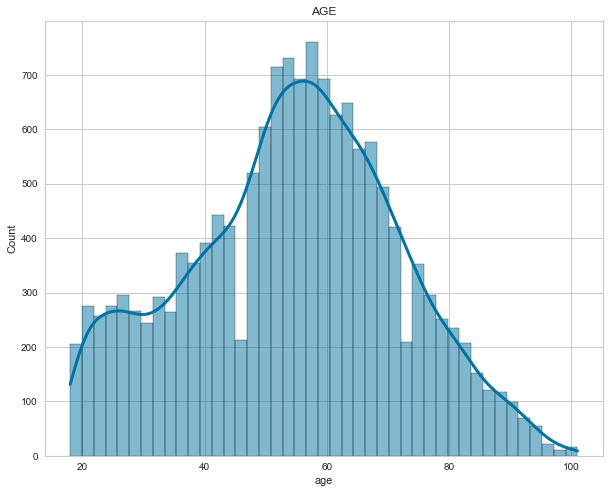

In [7]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "age",
             data=profile,
             #bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='AGE')

[Text(0.5, 1.0, 'INCOME')]

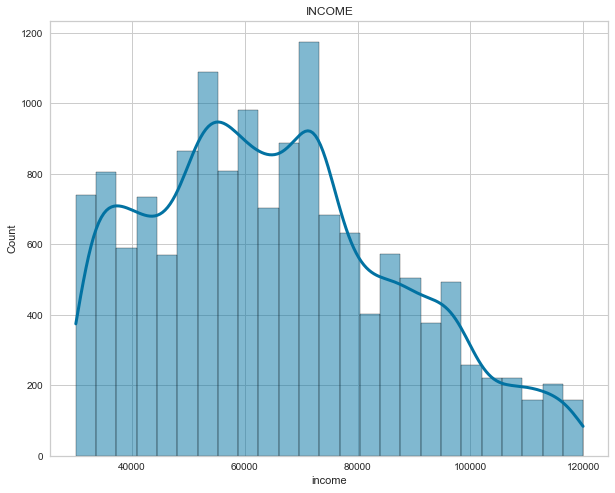

In [8]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "income",
             data=profile,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='INCOME')

[Text(0.5, 1.0, 'BECAME MEMBER ON')]

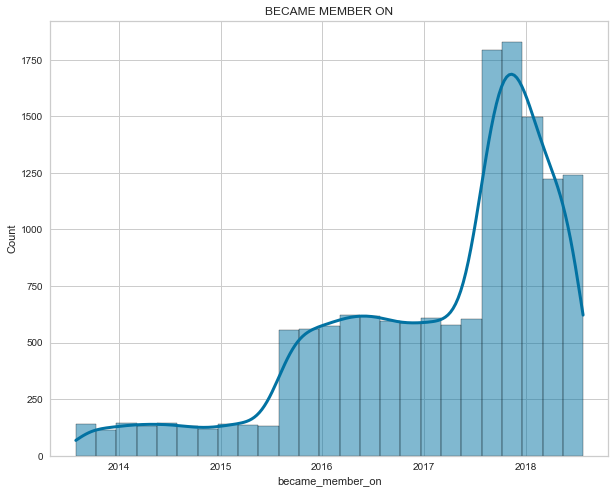

In [9]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "became_member_on",
             data=profile,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='BECAME MEMBER ON')

# Dealing with missing values in the `profile` dataset (optionnal)

In [10]:
#imp.reload(utm)

In [11]:
#profile = utm.missingValuesProfileIncome(profile, how = 'impute')

In [12]:
#profile = utm.missingValuesProfileGender(profile, how = 'impute')

In [13]:
#profile = utm.missingValuesProfileAge(profile, how = 'impute')

In [14]:
#print(profile.isnull().sum())

# Pre-processing

In [15]:
imp.reload(utm)

<module 'utils_main' from 'C:\\Users\\micka\\01_GitHub_mbastard\\TargetingCustomers_DAIB\\prep\\./../utils\\utils_main.py'>

In [16]:
profile_prep = utm.preprocessing(portfolio, profile, transcript)
profile_prep = profile_prep[profile_prep.age.notna()] # filter out the Nan for age
profile = profile_prep

In [17]:
profile.shape

(14825, 15)

In [18]:
print(profile_prep.isnull().sum())

id_membership                   0
prep_tot_aver_spend_bogo        0
prep_tot_aver_spend_discount    0
prep_recency                    0
prep_T                          0
prep_nb_of_offer_view           0
prep_nb_of_offer_rec            0
prep_nb_of_transactions         0
prep_nb_of_offer_comp           0
prep_tot_spend                  0
prep_tot_aver_spend             0
gender                          0
age                             0
became_member_on                0
income                          0
dtype: int64


## Plots

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND ON BOGO OFFERS PER CUSTOMER')]

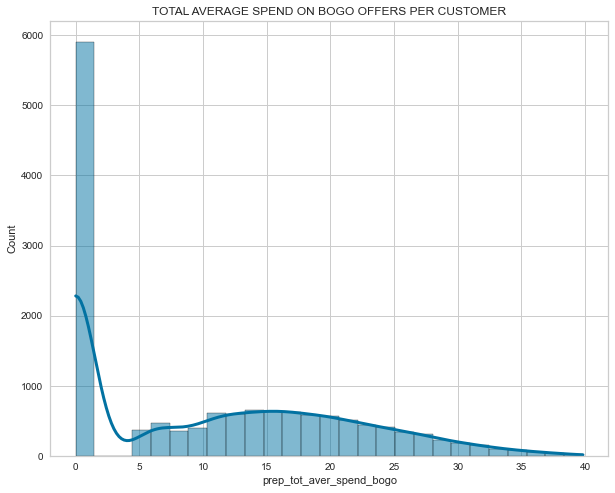

In [19]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend_bogo<40")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend_bogo",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND ON BOGO OFFERS PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND ON DISCOUNT OFFERS PER CUSTOMER')]

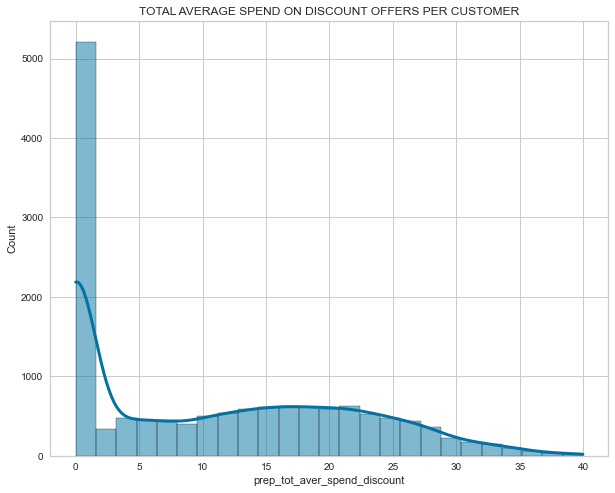

In [20]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend_discount<40")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend_discount",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND ON DISCOUNT OFFERS PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL SPEND PER CUSTOMER')]

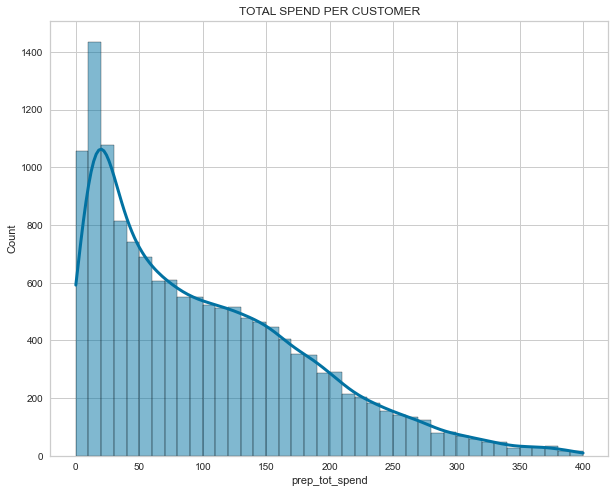

In [21]:
profile_prep_filt = profile_prep.query("prep_tot_spend<400")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_spend",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL SPEND PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND PER CUSTOMER')]

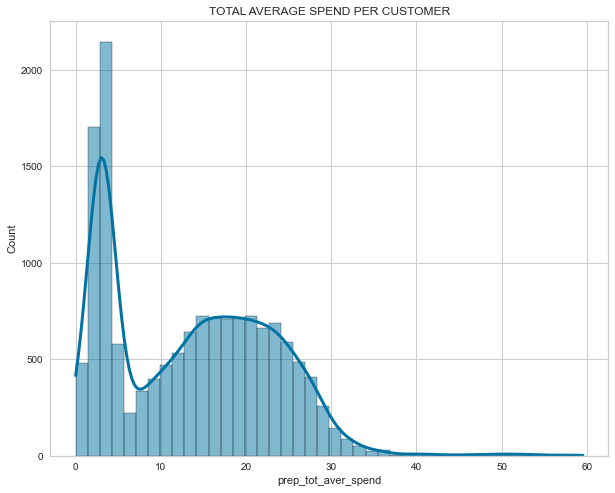

In [22]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend<60")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'RECENCY')]

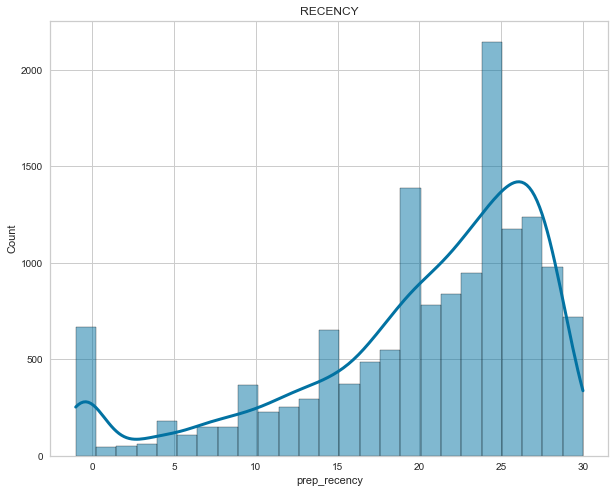

In [23]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_recency",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='RECENCY')

Recency : age of the customer when they made their most recent purchases in number of days. This is equal to the duration between a customer’s first purchase and their latest purchase.

[Text(0.5, 1.0, 'T')]

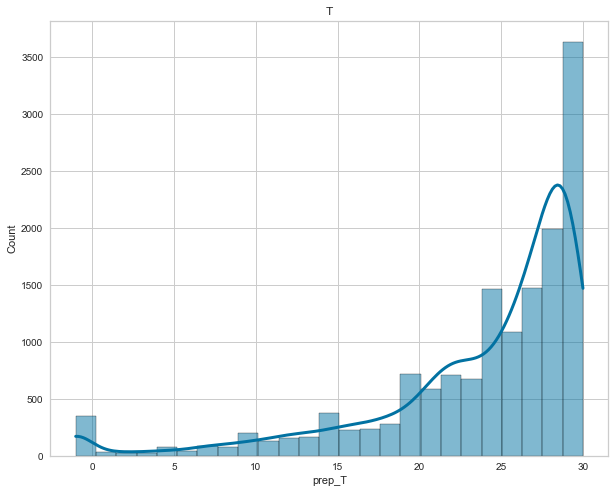

In [24]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_T",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='T')

T : age of the customer in days. This is equal to the duration between a customer’s first purchase and the end of the period under study.

[Text(0.5, 1.0, 'NUMBER OF TRANSACTIONS OVER THE SET PROMOTION PERIOD')]

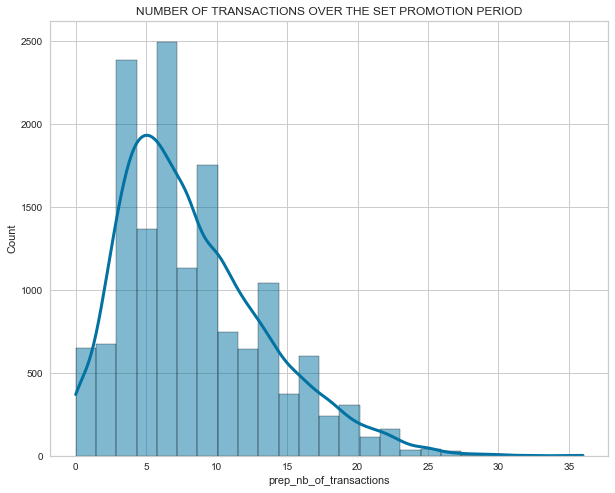

In [25]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_transactions",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF TRANSACTIONS OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER RECEIVED OVER THE SET PROMOTION PERIOD')]

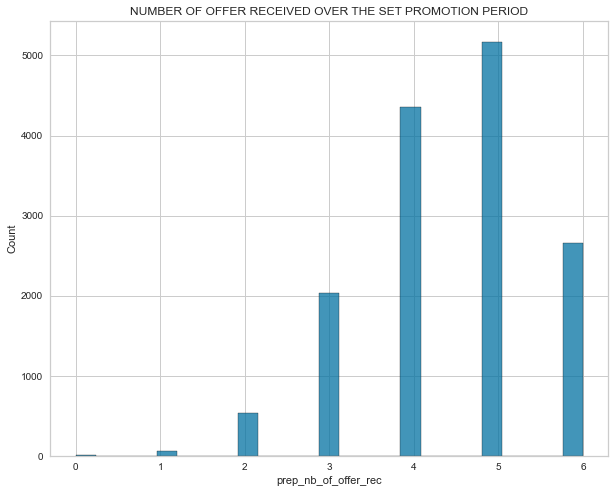

In [26]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_rec",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER RECEIVED OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER VIEWED OVER THE SET PROMOTION PERIOD')]

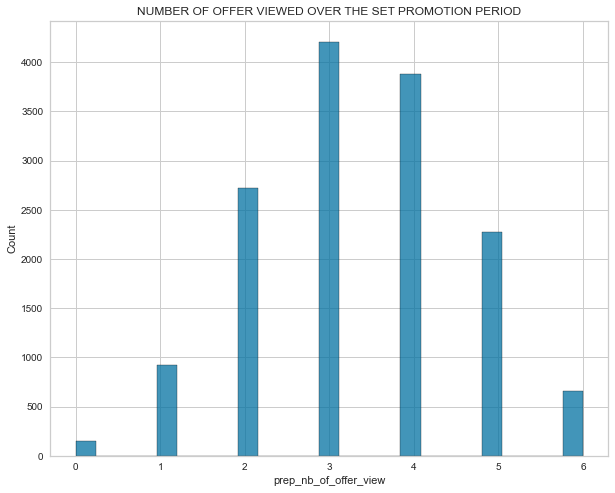

In [27]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_view",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER VIEWED OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER COMPLETED OVER THE SET PROMOTION PERIOD')]

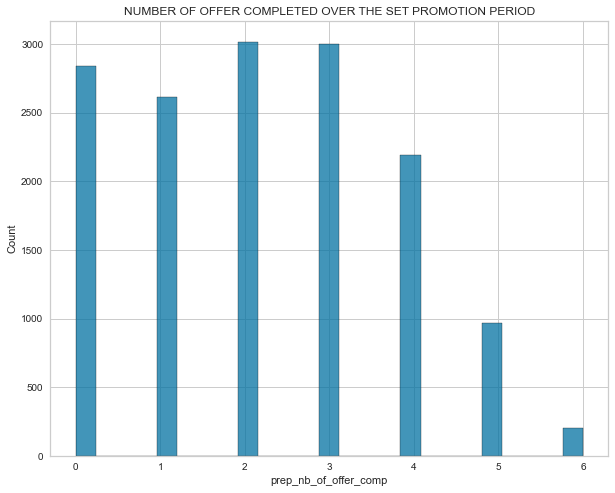

In [28]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_comp",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER COMPLETED OVER THE SET PROMOTION PERIOD')

# One-hot encoding

In [29]:
portfolio, profile, transcript = utm.oneHotEncoder(portfolio, profile, transcript, dropUnnecessaryCol = False)

In [30]:
profile.columns

Index(['id_membership', 'prep_tot_aver_spend_bogo',
       'prep_tot_aver_spend_discount', 'prep_recency', 'prep_T',
       'prep_nb_of_offer_view', 'prep_nb_of_offer_rec',
       'prep_nb_of_transactions', 'prep_nb_of_offer_comp', 'prep_tot_spend',
       'prep_tot_aver_spend', 'gender', 'age', 'became_member_on', 'income',
       'year_joined', 'gender_F', 'gender_M', 'gender_O', 'year_joined_2013',
       'year_joined_2014', 'year_joined_2015', 'year_joined_2016',
       'year_joined_2017', 'year_joined_2018'],
      dtype='object')

In [31]:
profile.shape

(14825, 25)

In [32]:
print(profile.isnull().sum())

id_membership                   0
prep_tot_aver_spend_bogo        0
prep_tot_aver_spend_discount    0
prep_recency                    0
prep_T                          0
prep_nb_of_offer_view           0
prep_nb_of_offer_rec            0
prep_nb_of_transactions         0
prep_nb_of_offer_comp           0
prep_tot_spend                  0
prep_tot_aver_spend             0
gender                          0
age                             0
became_member_on                0
income                          0
year_joined                     0
gender_F                        0
gender_M                        0
gender_O                        0
year_joined_2013                0
year_joined_2014                0
year_joined_2015                0
year_joined_2016                0
year_joined_2017                0
year_joined_2018                0
dtype: int64


# Modeling

## Select variables and set index

In [33]:
profile_clust = profile.drop(["year_joined", "gender", "became_member_on", "prep_tot_spend"], axis=1).copy()
profile_clust = profile_clust.set_index("id_membership")
print(profile_clust.isnull().sum())

prep_tot_aver_spend_bogo        0
prep_tot_aver_spend_discount    0
prep_recency                    0
prep_T                          0
prep_nb_of_offer_view           0
prep_nb_of_offer_rec            0
prep_nb_of_transactions         0
prep_nb_of_offer_comp           0
prep_tot_aver_spend             0
age                             0
income                          0
gender_F                        0
gender_M                        0
gender_O                        0
year_joined_2013                0
year_joined_2014                0
year_joined_2015                0
year_joined_2016                0
year_joined_2017                0
year_joined_2018                0
dtype: int64


## Feature scaling

In [34]:
scaler = StandardScaler().fit(profile_clust)
customers_scaled = scaler.transform(profile_clust)
customers_scaled.std(axis=0)[:5], customers_scaled.mean(axis=0)[:5]

(array([1., 1., 1., 1., 1.]),
 array([ 0.00000000e+00,  0.00000000e+00, -1.07360251e-16,  1.53371788e-16,
        -1.53371788e-16]))

## Dimensionality reduction

In [35]:
mypalette = ["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]
mypalette_d = ["#cce6da", "#66b491", "#008248"]
genders = ["#8700f9", "#00c4a9", "#4462D1"]

In [36]:
pca = PCA()
X_pca = pca.fit_transform(customers_scaled)

C:\Users\micka\AppData\Local\Temp/ipykernel_3708/698249127.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', linewidth=0.5)


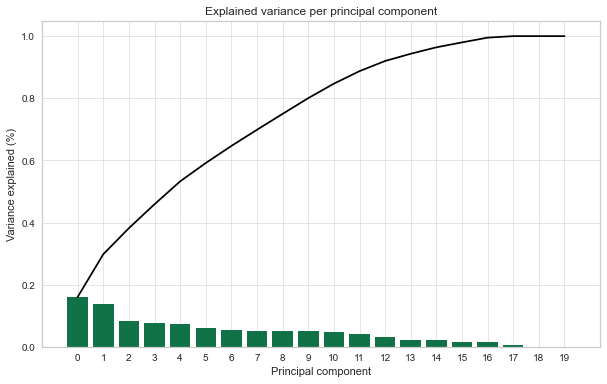

In [37]:
# Scree plot (variance explained by each principal component)
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)

plt.figure(figsize=(10,6))

ax = sns.barplot(ind, vals, ci=None, palette=mypalette[:1])
ax2 = sns.lineplot(ind, cumvals, ci=None, color="black")
ax.grid(b=True, which='major', linewidth=0.5)

ax.set_xlabel("Principal component")
ax.set_ylabel("Variance explained (%)")
plt.title('Explained variance per principal component');

In [38]:
cum_expl_var_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = len(cum_expl_var_ratio[cum_expl_var_ratio <= 0.8])

# rerun PCA with components that explain 80% of the variance
pca = PCA(num_components).fit(customers_scaled)
X_pca = pca.transform(customers_scaled)
X_pca = pd.DataFrame(X_pca)

np.cumsum(pca.explained_variance_ratio_)

array([0.16050911, 0.29800213, 0.38188585, 0.45887156, 0.53253585,
       0.5915747 , 0.64653489, 0.69862293, 0.7497757 ])

In [39]:
len(np.cumsum(pca.explained_variance_ratio_))

9

## Clustering & K-means

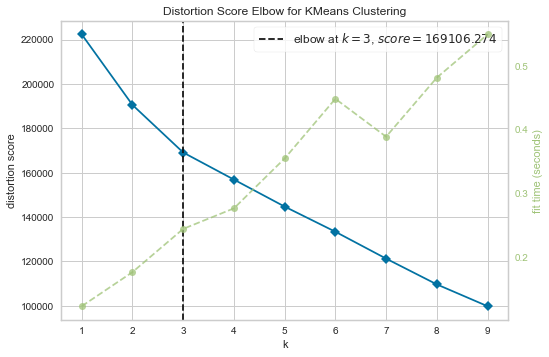

In [40]:
# elbow method
kelbow_visualizer(KMeans(), X_pca, k=(1,10));

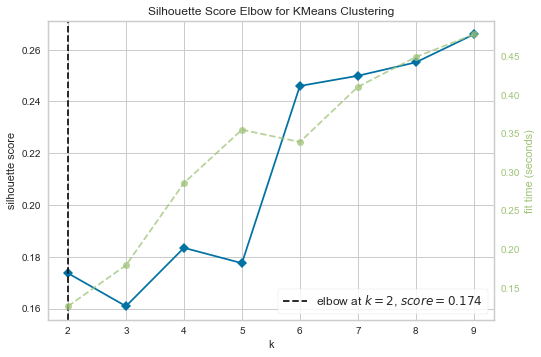

In [41]:
# silhouette method
kelbow_visualizer(KMeans(), X_pca, k=(2,10), metric='silhouette');

In [42]:
model = KMeans(n_clusters=3, random_state=28).fit(X_pca)
kmeans_clusters = model.predict(X_pca)

In [43]:
df = X_pca.copy()
df['cluster'] = kmeans_clusters

In [44]:
#sns.pairplot(df, hue='cluster')

# Evaluation and Interpretation

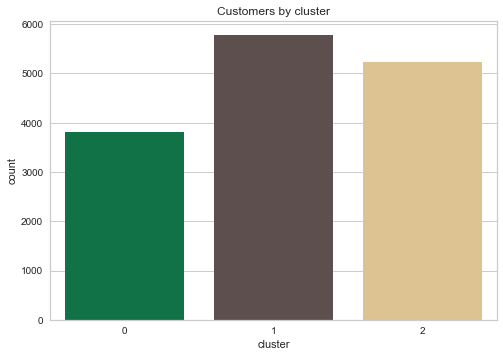

In [45]:
df = profile_clust.copy().reset_index()
df['cluster'] = kmeans_clusters
ax = sns.countplot(x='cluster', data=df, palette=mypalette)
ax.set_title('Customers by cluster');
fig = ax.get_figure()
fig.savefig("customers_by_cluster_mb_v1.png") 

In [46]:
df = profile_clust.copy().reset_index()
df['cluster'] = kmeans_clusters
df = df.melt(id_vars=['id_membership', 'cluster'])
df = df.query('cluster != -1').groupby(['cluster', 'variable']).mean().reset_index()
df.head()

,cluster,variable,value
0,0,age,53.463434
1,0,gender_F,0.267104
2,0,gender_M,0.712975
3,0,gender_O,0.019921
4,0,income,62166.710354


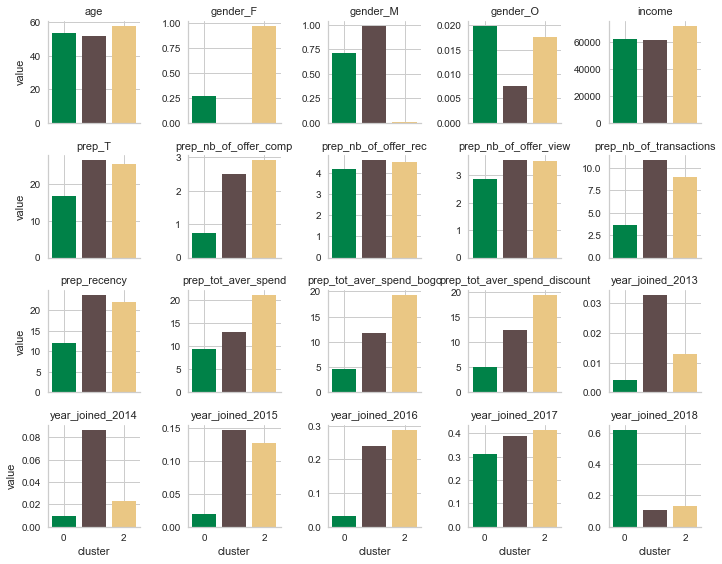

In [47]:
g = sns.FacetGrid(df, col='variable', hue='cluster', palette=mypalette, col_wrap=5, height=2, sharey=False)
g = g.map(plt.bar, 'cluster', 'value').set_titles("{col_name}")
g.savefig("cluster_facetgrid_mb_v1.png") 

# Yellow Group - Women who spend a lot and complete a lot of offers
* Mainly Women (almost 100%)
* 2 to 4 years of seniority
* High recency (More than 20 days)
* High total average spend (i.e. around 20 dollars)
* High total average spend on bogo and discount offers (i.e. around 20 dollars)
* High number of offer completed (i.e. around 3)
* High number of transactions (i.e. more than 7)

# Green Group - Mostly men not completing offers, and spending less when they use offers, who joined less than 2 years ago (i.e. low seniority)
* Mainly Men (75% of men and 25% of women)
* Joined lately in 2017 and 2018 (90% of them)
* Low recency (about 10 days) --> joined less than 2 years ago
* Low total average spend (i.e. less than 10 dollar)
* Low total average spend on bogo and discount (i.e. 5 dollar)
* --> spend less when they use bogo and discount offers (5<10)
* Low number of offer completed (i.e. less than one)
* Low number of transactions (i.e. around 3)

# Brown Group - Men spending on average always the same even if they do not receive offers
* Mainly Men (almost 100%)
* Has more than one year seniority
* High recency (More than 20 days)
* Medium total average spend (i.e. around 12 dollars)
* Medium total average spend on bogo and discount offers (i.e. around 12 dollars)
* --> Spend the same when they complete bogo and discount offers
* Medium number of offer completed (i.e. around 2.5)
* High number of transactions (i.e. more than 10)